[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=== Classification Report ===
              precision    recall  f1-score   support

         neg       0.78      0.83      0.80       199
         pos       0.82      0.77      0.79       201

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400

F1-Score (positif): 0.7917737789203085


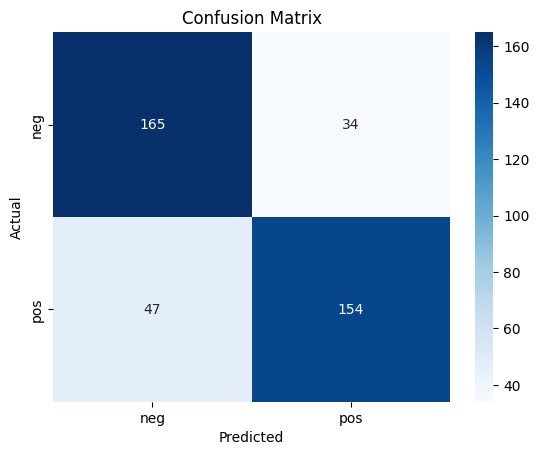

In [5]:

import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import movie_reviews, stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, f1_score

nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')

docs = [(movie_reviews.raw(fileid), category)
        for category in movie_reviews.categories()
        for fileid in movie_reviews.fileids(category)]

df = pd.DataFrame(docs, columns=["review", "label"])

stop_words = set(stopwords.words("english"))

def preprocess(text):
    tokens = word_tokenize(text.lower())
    words = [w for w in tokens if w.isalpha() and w not in stop_words]
    return " ".join(words)

df['clean_review'] = df['review'].apply(preprocess)

# 5. TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df["clean_review"])
y = df["label"]

# 6. Split data training/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Model Training
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 8. Evaluasi
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

f1 = f1_score(y_test, y_pred, pos_label='pos')
print("F1-Score (positif):", f1)

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['neg', 'pos'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['neg', 'pos'], yticklabels=['neg', 'pos'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

